In [160]:
import numpy as np 
import pandas as pd
import sklearn
import pickle
import glob
import keras as k
import matplotlib.pyplot as plt
from dataprep.eda import plot
from keras.layers import Dense
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate, RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score,classification_report,precision_recall_curve,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score, classification_report, precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import scipy.stats as stats
import seaborn as sns
import missingno as msno


%matplotlib inline

In [151]:
df_train = pd.read_csv('D:/minor/archive (1)/kidney_disease_train.csv')
df_test = pd.read_csv('D:/minor/archive (1)/kidney_disease_test.csv')

data_train = df_train
data_test = df_test




In [80]:
data_test.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,33,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no


In [81]:
data_train.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd


In [82]:
batch_size = len(data_train)
print(batch_size)

280


In [83]:
print(f'Shape of Train data {data_train.shape}')
print(f'Shape of Test data {data_test.shape}')


Shape of Train data (280, 26)
Shape of Test data (120, 25)


In [84]:
df_train=df_train.drop_duplicates()
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [85]:
df_test=df_test.drop_duplicates()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      120 non-null    int64  
 1   age     116 non-null    float64
 2   bp      117 non-null    float64
 3   sg      109 non-null    float64
 4   al      109 non-null    float64
 5   su      109 non-null    float64
 6   rbc     75 non-null     object 
 7   pc      105 non-null    object 
 8   pcc     120 non-null    object 
 9   ba      120 non-null    object 
 10  bgr     109 non-null    float64
 11  bu      115 non-null    float64
 12  sc      115 non-null    float64
 13  sod     100 non-null    float64
 14  pot     100 non-null    float64
 15  hemo    107 non-null    float64
 16  pcv     101 non-null    object 
 17  wc      92 non-null     float64
 18  rc      83 non-null     float64
 19  htn     119 non-null    object 
 20  dm      119 non-null    object 
 21  cad     119 non-null    object 
 22  ap

In [86]:
df_train.nunique()

id                280
age                70
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               126
bu                 99
sc                 71
sod                33
pot                35
hemo              102
pcv                39
wc                 78
rc                 48
htn                 2
dm                  4
cad                 3
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [87]:
df_test.nunique()

id       120
age       53
bp         7
sg         5
al         5
su         6
rbc        2
pc         2
pcc        2
ba         2
bgr       72
bu        66
sc        43
sod       24
pot       30
hemo      71
pcv       36
wc        53
rc        35
htn        2
dm         3
cad        2
appet      2
pe         2
ane        2
dtype: int64

In [88]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
id,280.0,202.928571,111.988168,1.000,110.50,202.00,302.25,399.000
age,275.0,51.454545,17.476176,2.000,42.00,55.00,65.00,90.000
bp,271.0,76.051661,14.256289,50.000,70.00,70.00,80.00,180.000
sg,244.0,1.017439,0.005746,1.005,1.01,1.02,1.02,1.025
al,245.0,1.024490,1.375805,0.000,0.00,0.00,2.00,5.000
su,242.0,0.438017,1.073193,0.000,0.00,0.00,0.00,5.000
bgr,247.0,150.186235,77.357144,70.000,100.00,124.00,171.50,490.000
bu,266.0,56.983835,51.456635,10.000,27.25,41.00,64.75,391.000
sc,268.0,3.006157,5.850085,0.400,0.90,1.30,2.80,76.000
sod,213.0,137.255869,11.677123,4.500,135.00,138.00,141.00,163.000


In [89]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,120.0,191.500000,123.781184,0.000,77.750,180.50,292.50,396.000
age,116.0,51.551724,16.494186,5.000,42.000,54.50,63.00,82.000
bp,117.0,77.435897,12.258273,50.000,70.000,80.00,90.00,110.000
sg,109.0,1.017339,0.005675,1.005,1.015,1.02,1.02,1.025
al,109.0,1.000000,1.305260,0.000,0.000,0.00,2.00,4.000
su,109.0,0.477064,1.159473,0.000,0.000,0.00,0.00,5.000
bgr,109.0,143.165138,83.641709,22.000,95.000,113.00,141.00,490.000
bu,115.0,58.447826,48.429293,1.500,25.000,46.00,72.00,235.000
sc,115.0,3.226957,5.500659,0.500,0.900,1.20,3.05,48.100
sod,100.0,138.110000,6.996240,111.000,135.000,139.00,142.00,150.000


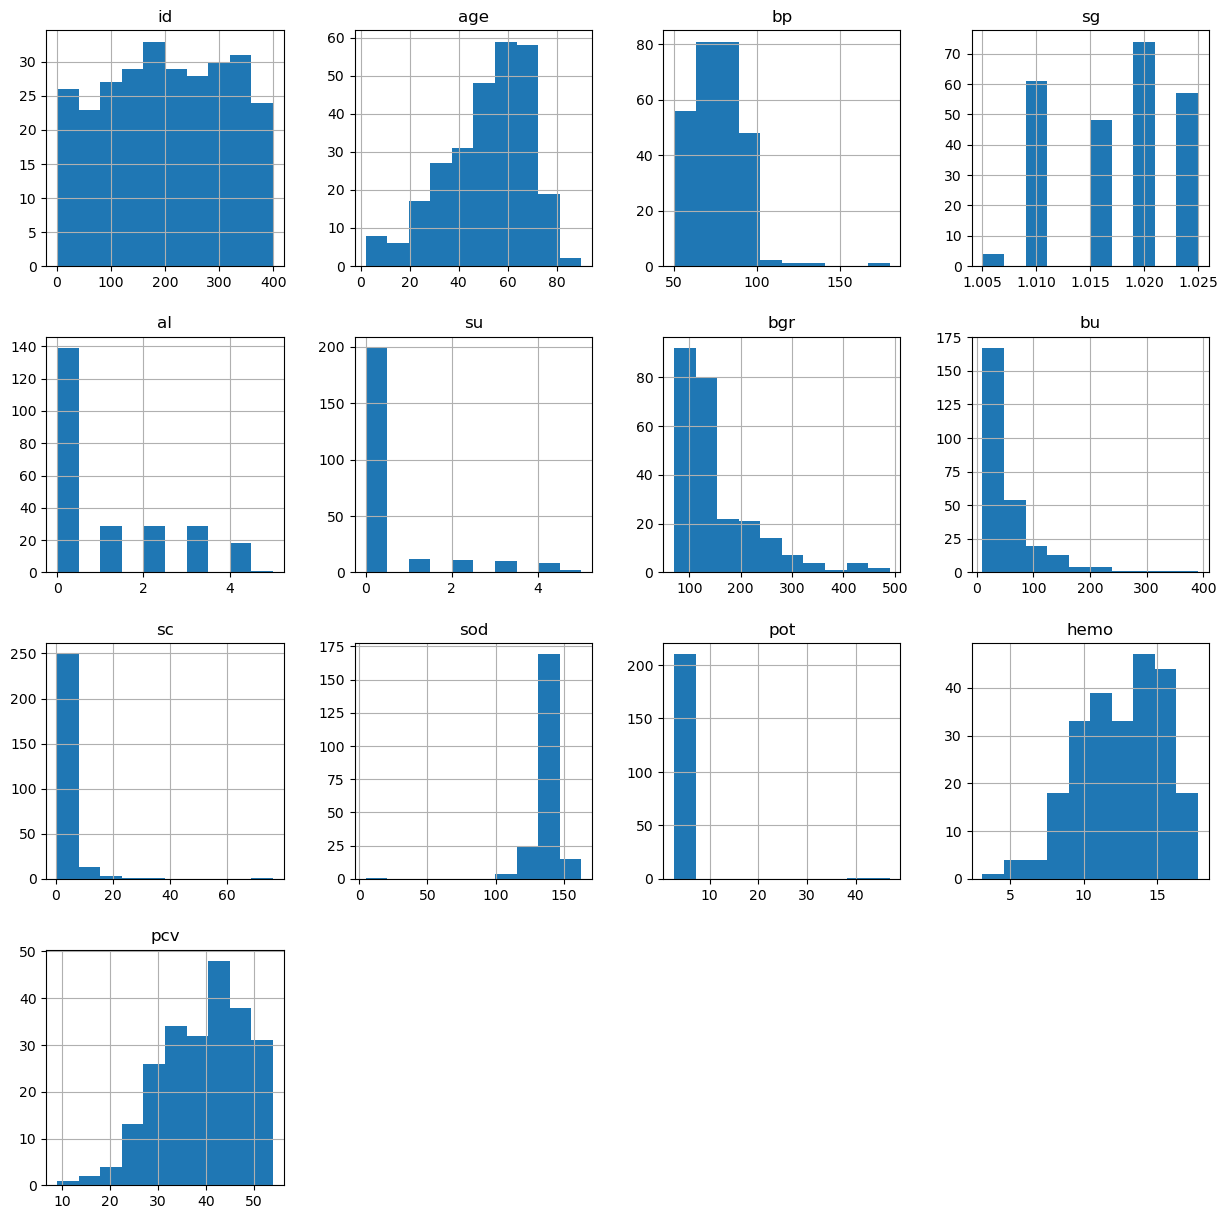

In [90]:
plot = df_train.hist(figsize=(15,15))

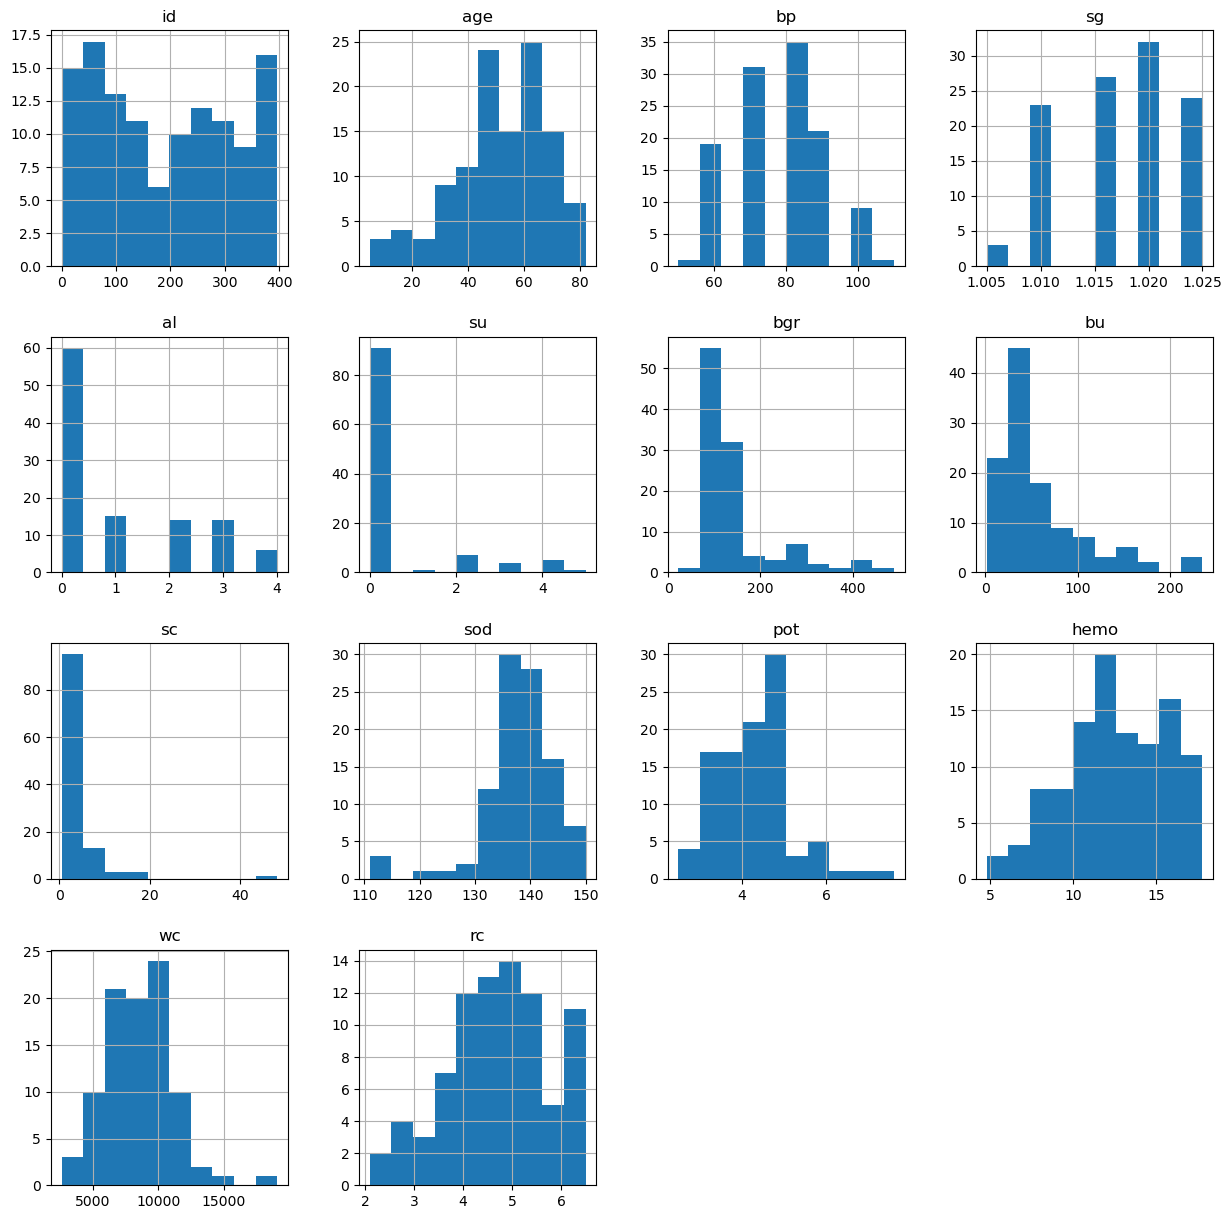

In [91]:
plot = df_test.hist(figsize=(15,15))

In [92]:
df_train.isna().sum()

id                  0
age                 5
bp                  9
sg                 36
al                 35
su                 38
rbc               107
pc                 50
pcc                 4
ba                  4
bgr                33
bu                 14
sc                 12
sod                67
pot                68
hemo               39
pcv                51
wc                 77
rc                 93
htn                 1
dm                  1
cad                 1
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [93]:
df_train.corr(numeric_only = True)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
id,1.000000,-0.203297,-0.241728,0.686117,-0.529140,-0.310249,-0.413028,-0.290575,-0.279816,0.359202,-0.117775,0.623203,0.616304
age,-0.203297,1.000000,0.159061,-0.216672,0.141512,0.182331,0.248271,0.197669,0.137053,-0.125302,0.059592,-0.244506,-0.244597
bp,-0.241728,0.159061,1.000000,-0.226841,0.115326,0.222696,0.149322,0.163732,0.165294,-0.086903,0.093219,-0.298948,-0.316792
sg,0.686117,-0.216672,-0.226841,1.000000,-0.467827,-0.278341,-0.382860,-0.341058,-0.405656,0.440390,-0.098296,0.634550,0.652851
al,-0.529140,0.141512,0.115326,-0.467827,1.000000,0.306732,0.460787,0.445732,0.353454,-0.433237,0.151559,-0.640496,-0.621318
su,-0.310249,0.182331,0.222696,-0.278341,0.306732,1.000000,0.650541,0.197614,0.295447,-0.125928,0.289096,-0.272691,-0.289357
bgr,-0.413028,0.248271,0.149322,-0.382860,0.460787,0.650541,1.000000,0.147776,0.147585,-0.302412,0.099336,-0.342712,-0.332651
bu,-0.290575,0.197669,0.163732,-0.341058,0.445732,0.197614,0.147776,1.000000,0.609569,-0.276002,0.399230,-0.592364,-0.573527
sc,-0.279816,0.137053,0.165294,-0.405656,0.353454,0.295447,0.147585,0.609569,1.000000,-0.714504,0.358307,-0.339347,-0.338642
sod,0.359202,-0.125302,-0.086903,0.440390,-0.433237,-0.125928,-0.302412,-0.276002,-0.714504,1.000000,0.127225,0.317406,0.335550


In [94]:
df_test.corr(numeric_only = True)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,wc,rc
id,1.000000,-0.145713,-0.256720,0.557097,-0.577933,-0.232053,-0.210198,-0.346143,-0.245127,0.454185,-0.057654,0.675805,-0.137319,0.632989
age,-0.145713,1.000000,0.162146,-0.129386,0.071820,0.306908,0.243284,0.195010,0.120187,-0.016227,0.135679,-0.074988,0.025831,-0.137769
bp,-0.256720,0.162146,1.000000,-0.200899,0.282964,0.225905,0.204868,0.261954,0.089250,-0.263970,-0.018728,-0.331389,0.000590,-0.383889
sg,0.557097,-0.129386,-0.200899,1.000000,-0.474988,-0.333000,-0.362442,-0.250539,-0.251957,0.356337,0.039806,0.540478,-0.144533,0.506797
al,-0.577933,0.071820,0.282964,-0.474988,1.000000,0.189662,0.221810,0.474036,0.515988,-0.520306,0.038461,-0.633463,0.068864,-0.626722
su,-0.232053,0.306908,0.225905,-0.333000,0.189662,1.000000,0.849762,0.105271,0.064487,-0.143478,-0.058187,-0.138606,0.243269,-0.166051
bgr,-0.210198,0.243284,0.204868,-0.362442,0.221810,0.849762,1.000000,0.135918,0.074030,-0.209884,-0.087525,-0.236553,0.286322,-0.186615
bu,-0.346143,0.195010,0.261954,-0.250539,0.474036,0.105271,0.135918,1.000000,0.525660,-0.530065,0.332572,-0.649804,-0.027227,-0.685892
sc,-0.245127,0.120187,0.089250,-0.251957,0.515988,0.064487,0.074030,0.525660,1.000000,-0.538434,0.327241,-0.660397,-0.062305,-0.709305
sod,0.454185,-0.016227,-0.263970,0.356337,-0.520306,-0.143478,-0.209884,-0.530065,-0.538434,1.000000,-0.073729,0.569104,-0.018298,0.491692


In [95]:
data_train.skew()

C:\Users\sudha\AppData\Local\Temp\ipykernel_9972\3869386678.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.skew()


id     -0.056679
age    -0.671129
bp      2.003336
sg     -0.166490
al      1.012426
su      2.528299
bgr     1.964349
bu      2.954937
sc      8.283930
sod    -7.123213
pot     9.860723
hemo   -0.351304
pcv    -0.482163
dtype: float64

In [96]:
cat_var=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
num_var=['id','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
print(f'Number of Categirical Variables including Label is {len(cat_var)}')
print(f'Number of Numerical Variables including Label is {len(num_var)}')

Number of Categirical Variables including Label is 13
Number of Numerical Variables including Label is 12


In [97]:
data_train.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [98]:
data_train[data_train['wc'].map(lambda x:type(x)==str)].wc.value_counts()


11000    8
9600     8
6700     8
9800     7
7200     6
        ..
10900    1
12200    1
5900     1
5200     1
14600    1
Name: wc, Length: 78, dtype: int64

In [99]:
data_train[data_train['rc'].map(lambda x:type(x)==str)].rc.value_counts()


4.5    10
5.2    10
5.5     8
4.7     8
4.8     8
4.9     8
3.4     7
6.1     7
5.4     6
4.6     6
5.9     6
3.8     6
5.8     5
3.9     5
5.0     5
4.3     5
5.6     5
5.3     5
5.7     5
4.4     4
4.1     4
3.2     4
6.5     3
5.1     3
6.2     3
4.0     3
3.7     3
4.2     3
6.0     3
3.5     3
3.3     3
3.6     3
3.0     2
6.4     2
2.6     2
3.1     2
2.5     1
2.9     1
2.7     1
2.4     1
6.3     1
8.0     1
\t?     1
2.3     1
2.1     1
4       1
3       1
5       1
Name: rc, dtype: int64

<Axes: ylabel='Frequency'>

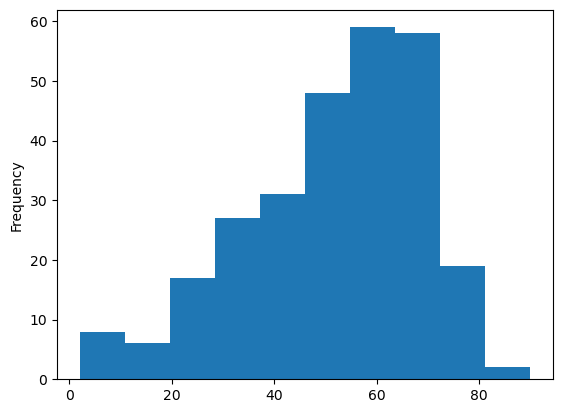

In [100]:
data_train['age'].plot(kind = 'hist')

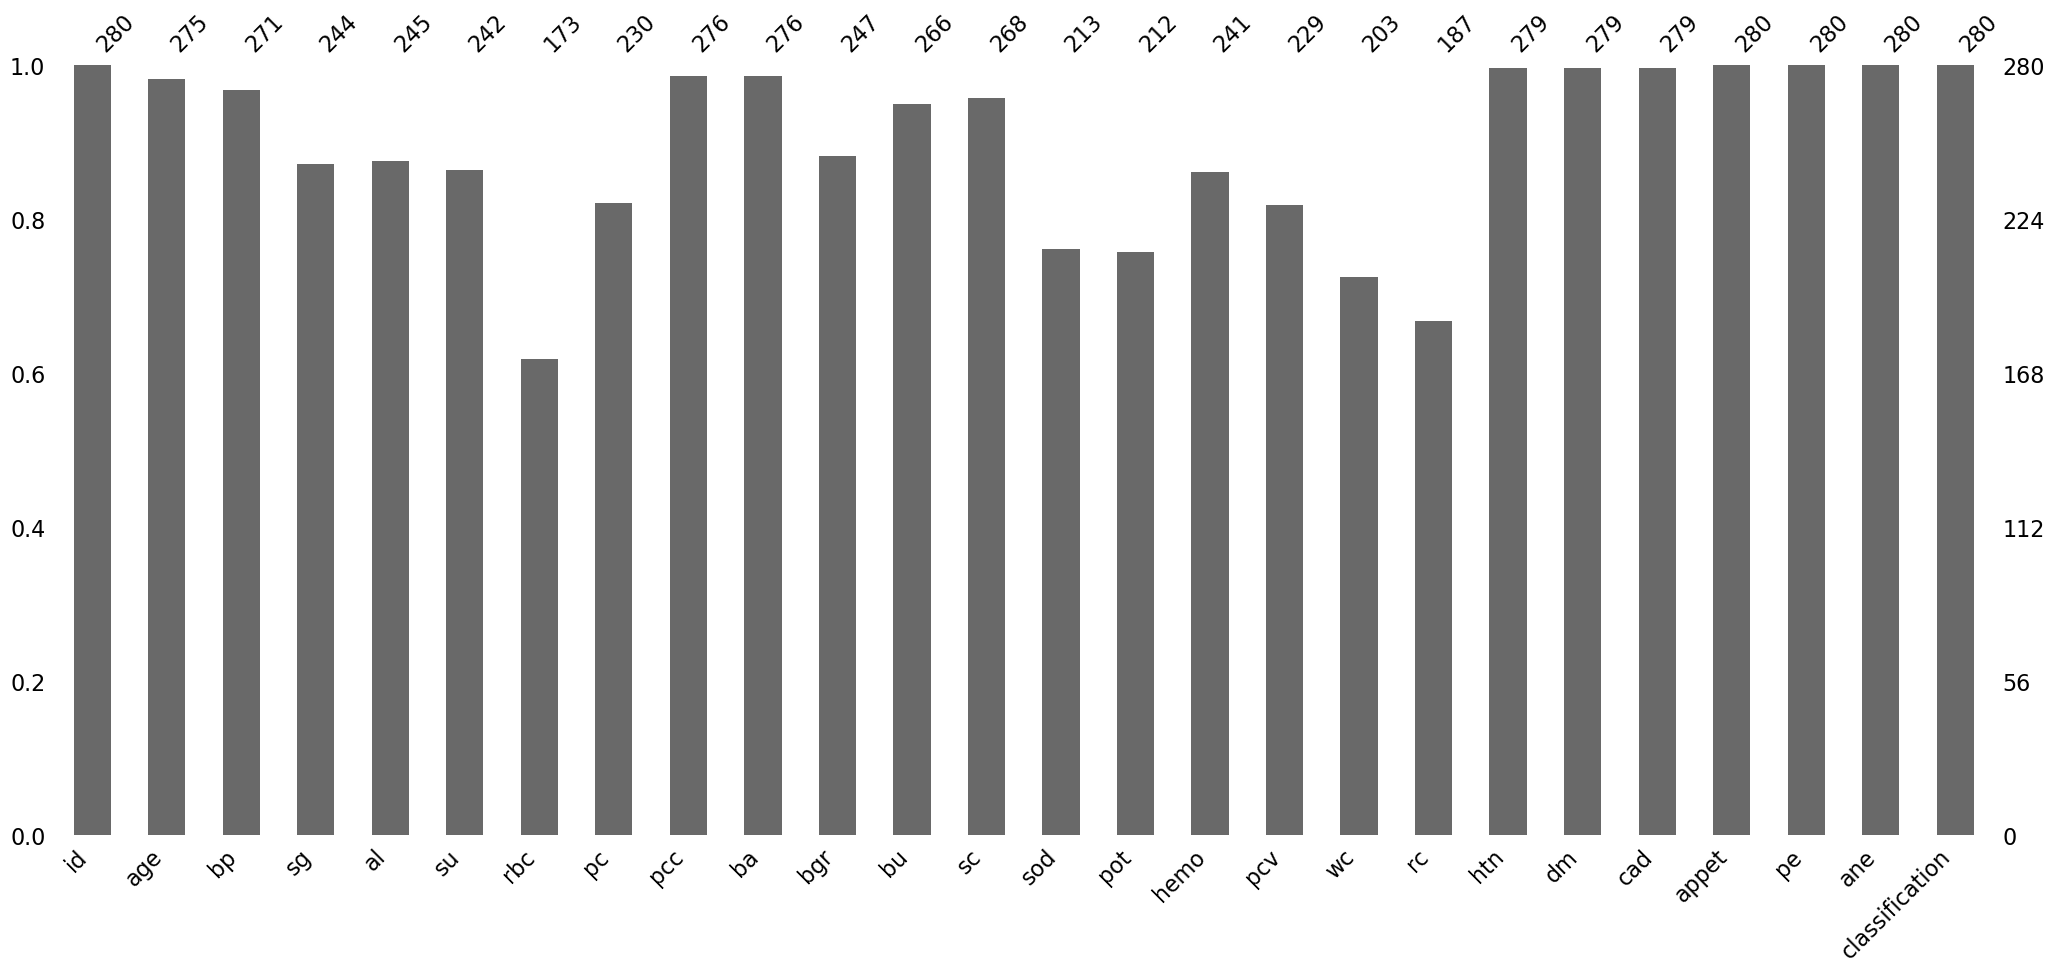

In [101]:
p = msno.bar(data_train)

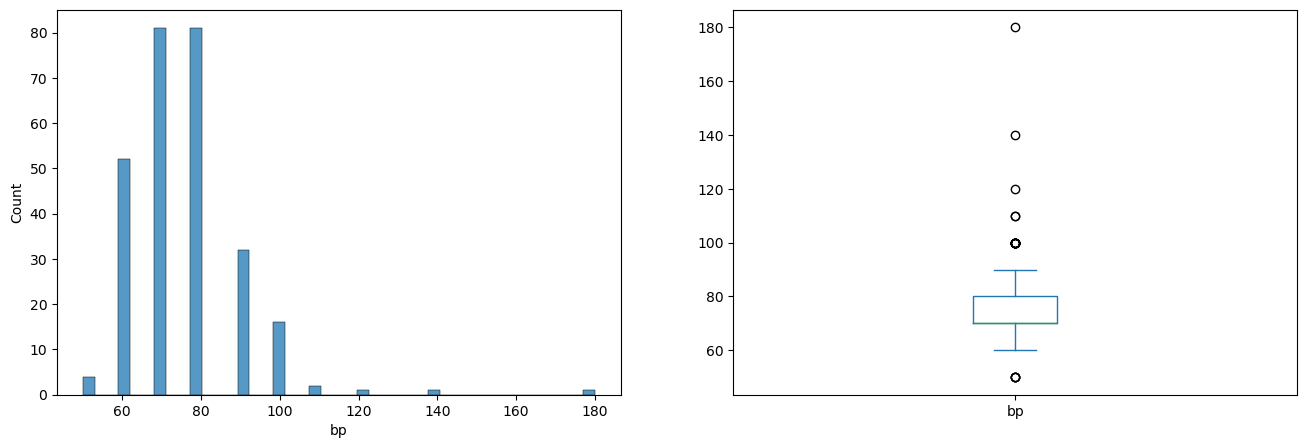

In [102]:
plt.subplot(121), sns.histplot(data_train['bp'])
plt.subplot(122), data_train['bp'].plot.box(figsize=(16,5))
plt.show()



In [103]:
train_df=data_train.copy()
train_df['wc']=pd.to_numeric(train_df['wc'],errors='coerce')
train_df['rc']=pd.to_numeric(train_df['rc'], errors='coerce')

In [104]:
train_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [105]:
train_df.apply(lambda x: x.isna().value_counts()). T


,False,True
id,280.0,NaN
age,275.0,5.0
bp,271.0,9.0
sg,244.0,36.0
al,245.0,35.0
su,242.0,38.0
rbc,173.0,107.0
pc,230.0,50.0
pcc,276.0,4.0
ba,276.0,4.0


C:\Users\sudha\anaconda3\envs\prediction\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


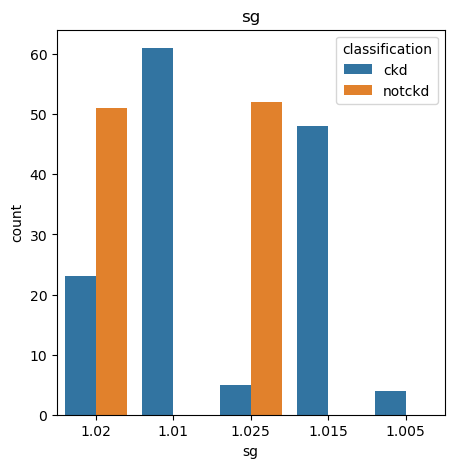

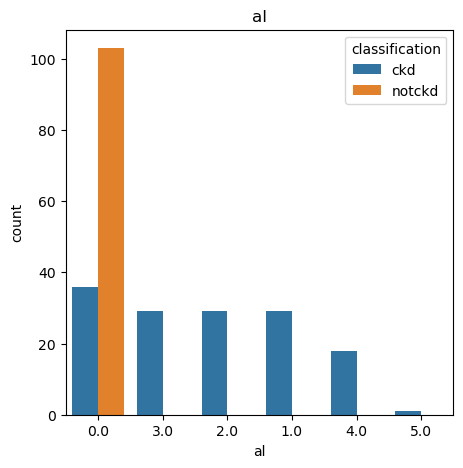

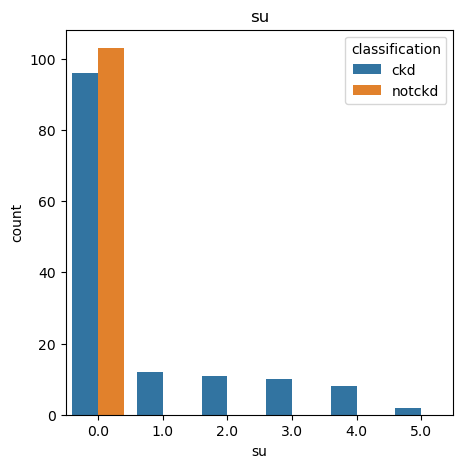

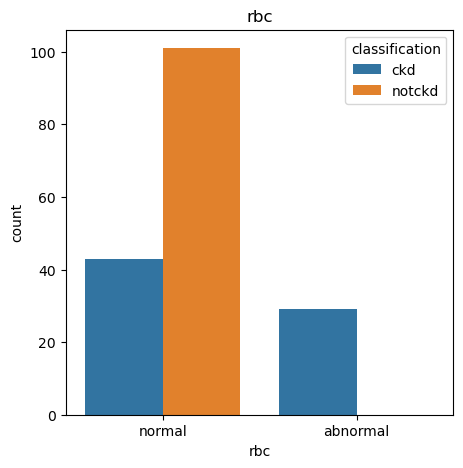

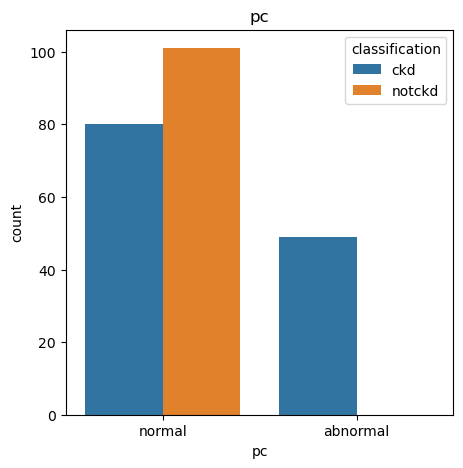

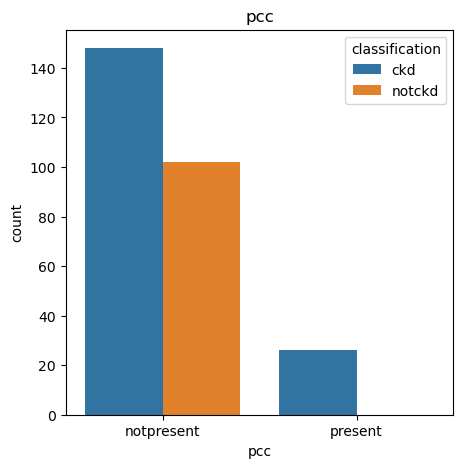

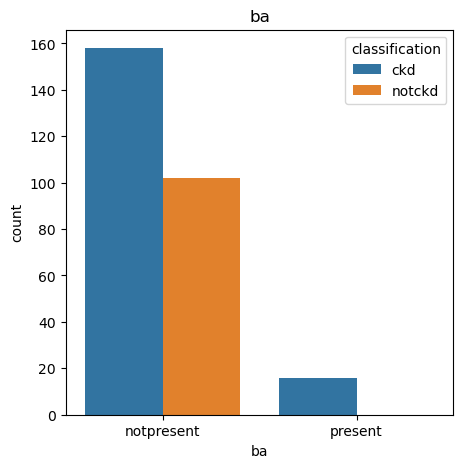

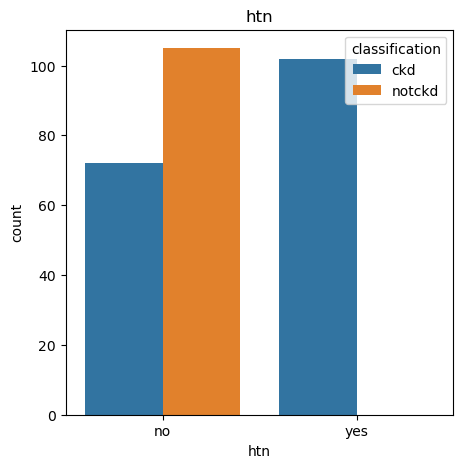

C:\Users\sudha\anaconda3\envs\prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


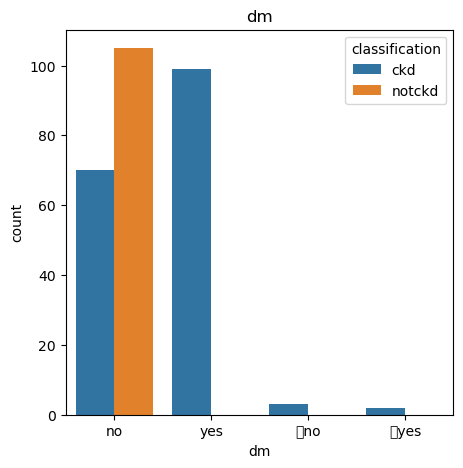

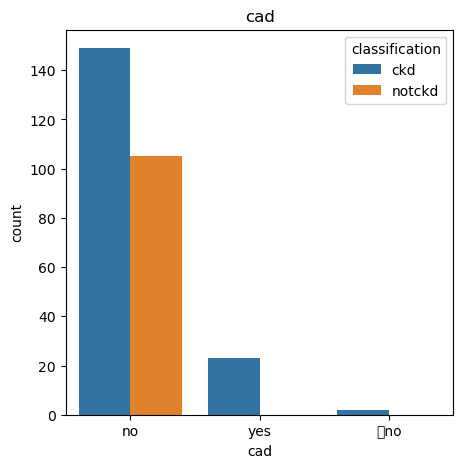

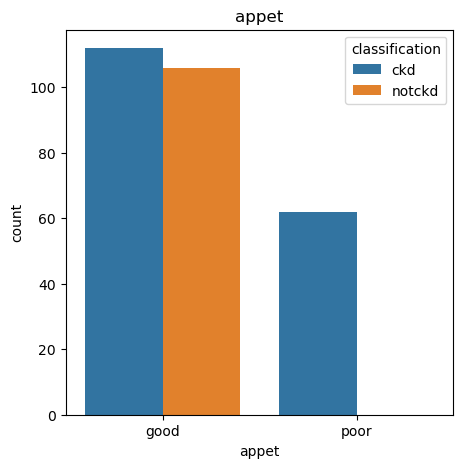

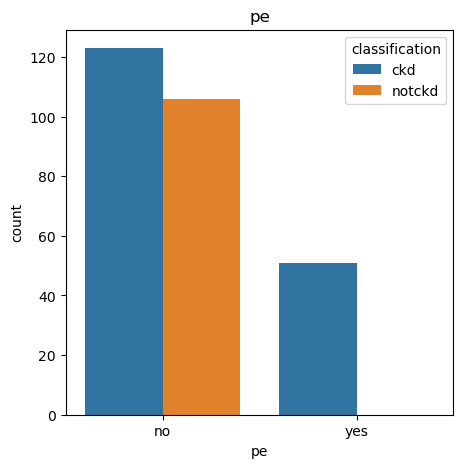

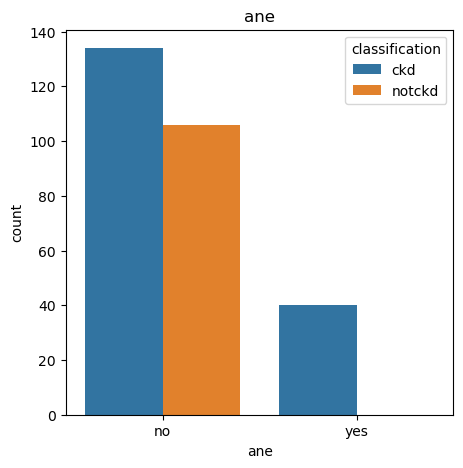

In [106]:
for feature in cat_var:
  plt.figure(figsize = (5,5))
  sns.countplot(x = feature, hue = 'classification', data = train_df, order = train_df[feature].value_counts().index)
  plt.title(feature)

In [107]:
for col in cat_var:
    print(f"Values counts for {col} are \n {train_df[col].value_counts()}")

Values counts for sg are 
 1.020    74
1.010    61
1.025    57
1.015    48
1.005     4
Name: sg, dtype: int64
Values counts for al are 
 0.0    139
3.0     29
2.0     29
1.0     29
4.0     18
5.0      1
Name: al, dtype: int64
Values counts for su are 
 0.0    199
1.0     12
2.0     11
3.0     10
4.0      8
5.0      2
Name: su, dtype: int64
Values counts for rbc are 
 normal      144
abnormal     29
Name: rbc, dtype: int64
Values counts for pc are 
 normal      181
abnormal     49
Name: pc, dtype: int64
Values counts for pcc are 
 notpresent    250
present        26
Name: pcc, dtype: int64
Values counts for ba are 
 notpresent    260
present        16
Name: ba, dtype: int64
Values counts for htn are 
 no     177
yes    102
Name: htn, dtype: int64
Values counts for dm are 
 no       175
yes       99
\tno       3
\tyes      2
Name: dm, dtype: int64
Values counts for cad are 
 no      254
yes      23
\tno      2
Name: cad, dtype: int64
Values counts for appet are 
 good    218
poor     62


In [108]:
train_df['dm']=train_df.dm.replace("\tno","no")
train_df['dm']=train_df.dm.replace("\tyes","yes")

train_df['cad']=train_df.cad.replace("\tno","no")

In [109]:
print(train_df.dm.value_counts())
print(train_df.cad.value_counts())

no     178
yes    101
Name: dm, dtype: int64
no     256
yes     23
Name: cad, dtype: int64


In [110]:
train_df.apply(lambda x: x.isna().value_counts()). T

,False,True
id,280.0,NaN
age,275.0,5.0
bp,271.0,9.0
sg,244.0,36.0
al,245.0,35.0
su,242.0,38.0
rbc,173.0,107.0
pc,230.0,50.0
pcc,276.0,4.0
ba,276.0,4.0


In [111]:
for col in num_var:
    print(f'Imputing for {col} with {train_df[col].median()}')
    train_df[col]=train_df[col].fillna(train_df[col].median())

Imputing for id with 202.0
Imputing for age with 55.0
Imputing for bp with 70.0
Imputing for bgr with 124.0
Imputing for bu with 41.0
Imputing for sc with 1.3
Imputing for sod with 138.0
Imputing for pot with 4.4
Imputing for hemo with 12.7
Imputing for pcv with 41.0
Imputing for wc with 7900.0
Imputing for rc with 4.8


In [112]:
for col in cat_var:
    print(f'Imputing for {col} with {train_df[col].mode()[0]}')
    train_df[col]=train_df[col].fillna(train_df[col].mode()[0])

Imputing for sg with 1.02
Imputing for al with 0.0
Imputing for su with 0.0
Imputing for rbc with normal
Imputing for pc with normal
Imputing for pcc with notpresent
Imputing for ba with notpresent
Imputing for htn with no
Imputing for dm with no
Imputing for cad with no
Imputing for appet with good
Imputing for pe with no
Imputing for ane with no


In [113]:
train_df.apply(lambda x: x.isna().value_counts()).T

,False
id,280
age,280
bp,280
sg,280
al,280
su,280
rbc,280
pc,280
pcc,280
ba,280


In [114]:
train_num_df=train_df[num_var].copy()
print(f'{train_num_df.head()}')
train_num_df.shape

    id   age     bp    bgr    bu   sc    sod  pot  hemo   pcv      wc   rc
0  157  62.0   70.0  122.0  42.0  1.7  136.0  4.7  12.6  39.0  7900.0  3.9
1  109  54.0   70.0  233.0  50.1  1.9  138.0  4.4  11.7  41.0  7900.0  4.8
2   17  47.0   80.0  114.0  87.0  5.2  139.0  3.7  12.1  41.0  7900.0  4.8
3  347  43.0   60.0  108.0  25.0  1.0  144.0  5.0  17.8  43.0  7200.0  5.5
4   24  42.0  100.0  124.0  50.0  1.4  129.0  4.0  11.1  39.0  8300.0  4.6


(280, 12)

In [115]:
train_num_zscore=train_num_df.apply(zscore)
train_num_zscore[~(np.abs(train_num_zscore)<3).all(axis=1)].shape

(25, 12)

In [116]:
train_num_zscore[~(np.abs(train_num_zscore) < 3).all(axis=1)]


,id,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
11,-0.518200,0.316991,1.007324,-0.316445,5.297192,1.759003,-1.124757,0.039634,-1.706351,-1.949834,-1.525581,-1.716211
30,-1.761625,0.953039,-0.417175,-0.645219,-0.043536,3.681036,-3.288900,-0.200963,-0.058065,-0.440285,-0.124303,0.074173
34,-1.725843,-0.087766,-1.129424,4.697359,-0.023608,0.186431,0.055685,-0.080664,-1.181896,-1.446651,-0.124303,0.074173
36,-0.893911,1.415620,-0.417175,1.080845,3.204743,1.269759,0.055685,-0.080664,-0.882208,-0.440285,1.693572,-0.641981
57,0.313732,1.184330,1.719573,0.738372,3.683017,1.828895,-1.026387,0.039634,-1.181896,-1.446651,-0.124303,0.074173
62,-0.723947,-1.012927,-0.417175,-0.316445,3.244599,1.619219,-0.731277,-0.261112,-2.455572,0.188694,-0.124303,0.074173
64,-1.215949,-0.376879,0.295075,3.806929,-0.302601,-0.285341,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
65,-0.044089,0.432637,1.719573,1.437017,-0.322529,0.046647,-0.042686,0.009559,-0.507597,-1.195060,6.882090,-1.000057
73,-1.045985,0.259169,0.295075,3.669940,-0.382313,-0.180503,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173
83,0.072203,0.143524,3.144071,-0.604122,-0.760947,-0.302814,0.055685,-0.080664,0.054319,0.188694,-0.124303,0.074173


In [117]:
(~(np.abs(train_num_zscore)<3)).sum(axis=0)

id      0
age     0
bp      3
bgr     7
bu      7
sc      3
sod     2
pot     2
hemo    1
pcv     1
wc      5
rc      2
dtype: int64

In [118]:
from scipy import stats
for col in num_var:
    print(f'Imputing for {col} with {train_df[col].median()}')
    train_df.loc[(np.abs(stats.zscore(train_num_df[col])) >= 3), col] = train_df[col].median()

Imputing for id with 202.0
Imputing for age with 55.0
Imputing for bp with 70.0
Imputing for bgr with 124.0
Imputing for bu with 41.0
Imputing for sc with 1.3
Imputing for sod with 138.0
Imputing for pot with 4.4
Imputing for hemo with 12.7
Imputing for pcv with 41.0
Imputing for wc with 7900.0
Imputing for rc with 4.8


In [119]:
cat_var

['sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [120]:
cat_nom_dict = {"rbc":     {"normal": 1, "abnormal": 0},
                "pc":     {"normal": 1, "abnormal": 0},
                "pcc":     {"present": 1, "notpresent": 0},
                "ba":     {"present": 1, "notpresent": 0},
                "htn":     {"yes": 1, "no": 0},
                "dm":     {"yes": 1, "no": 0},
                "cad":     {"yes": 1, "no": 0},
                "pe":     {"yes": 1, "no": 0},
                "ane":     {"yes": 1, "no": 0},
                "appet":     {"good": 1, "poor": 0},
                "classification":     {"ckd": 1, "notckd": 0} 
               }

In [121]:
train_df.replace(cat_nom_dict, inplace=True)
train_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,1,0,0,0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,109,54.0,70.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,17,47.0,80.0,1.020,0.0,0.0,1,1,0,0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,347,43.0,60.0,1.025,0.0,0.0,1,1,0,0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,24,42.0,100.0,1.015,4.0,0.0,1,0,0,1,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


In [122]:
train_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object

In [123]:
train_df.drop('id',axis=1,inplace=True)
train_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,1,0,0,0,122.0,...,39.0,7900.0,3.9,1,1,0,1,0,0,1
1,54.0,70.0,1.020,0.0,0.0,1,1,0,0,233.0,...,41.0,7900.0,4.8,0,1,0,1,0,0,1
2,47.0,80.0,1.020,0.0,0.0,1,1,0,0,114.0,...,41.0,7900.0,4.8,1,0,0,0,0,0,1
3,43.0,60.0,1.025,0.0,0.0,1,1,0,0,108.0,...,43.0,7200.0,5.5,0,0,0,1,0,0,0
4,42.0,100.0,1.015,4.0,0.0,1,0,0,1,124.0,...,39.0,8300.0,4.6,1,0,0,0,0,0,1


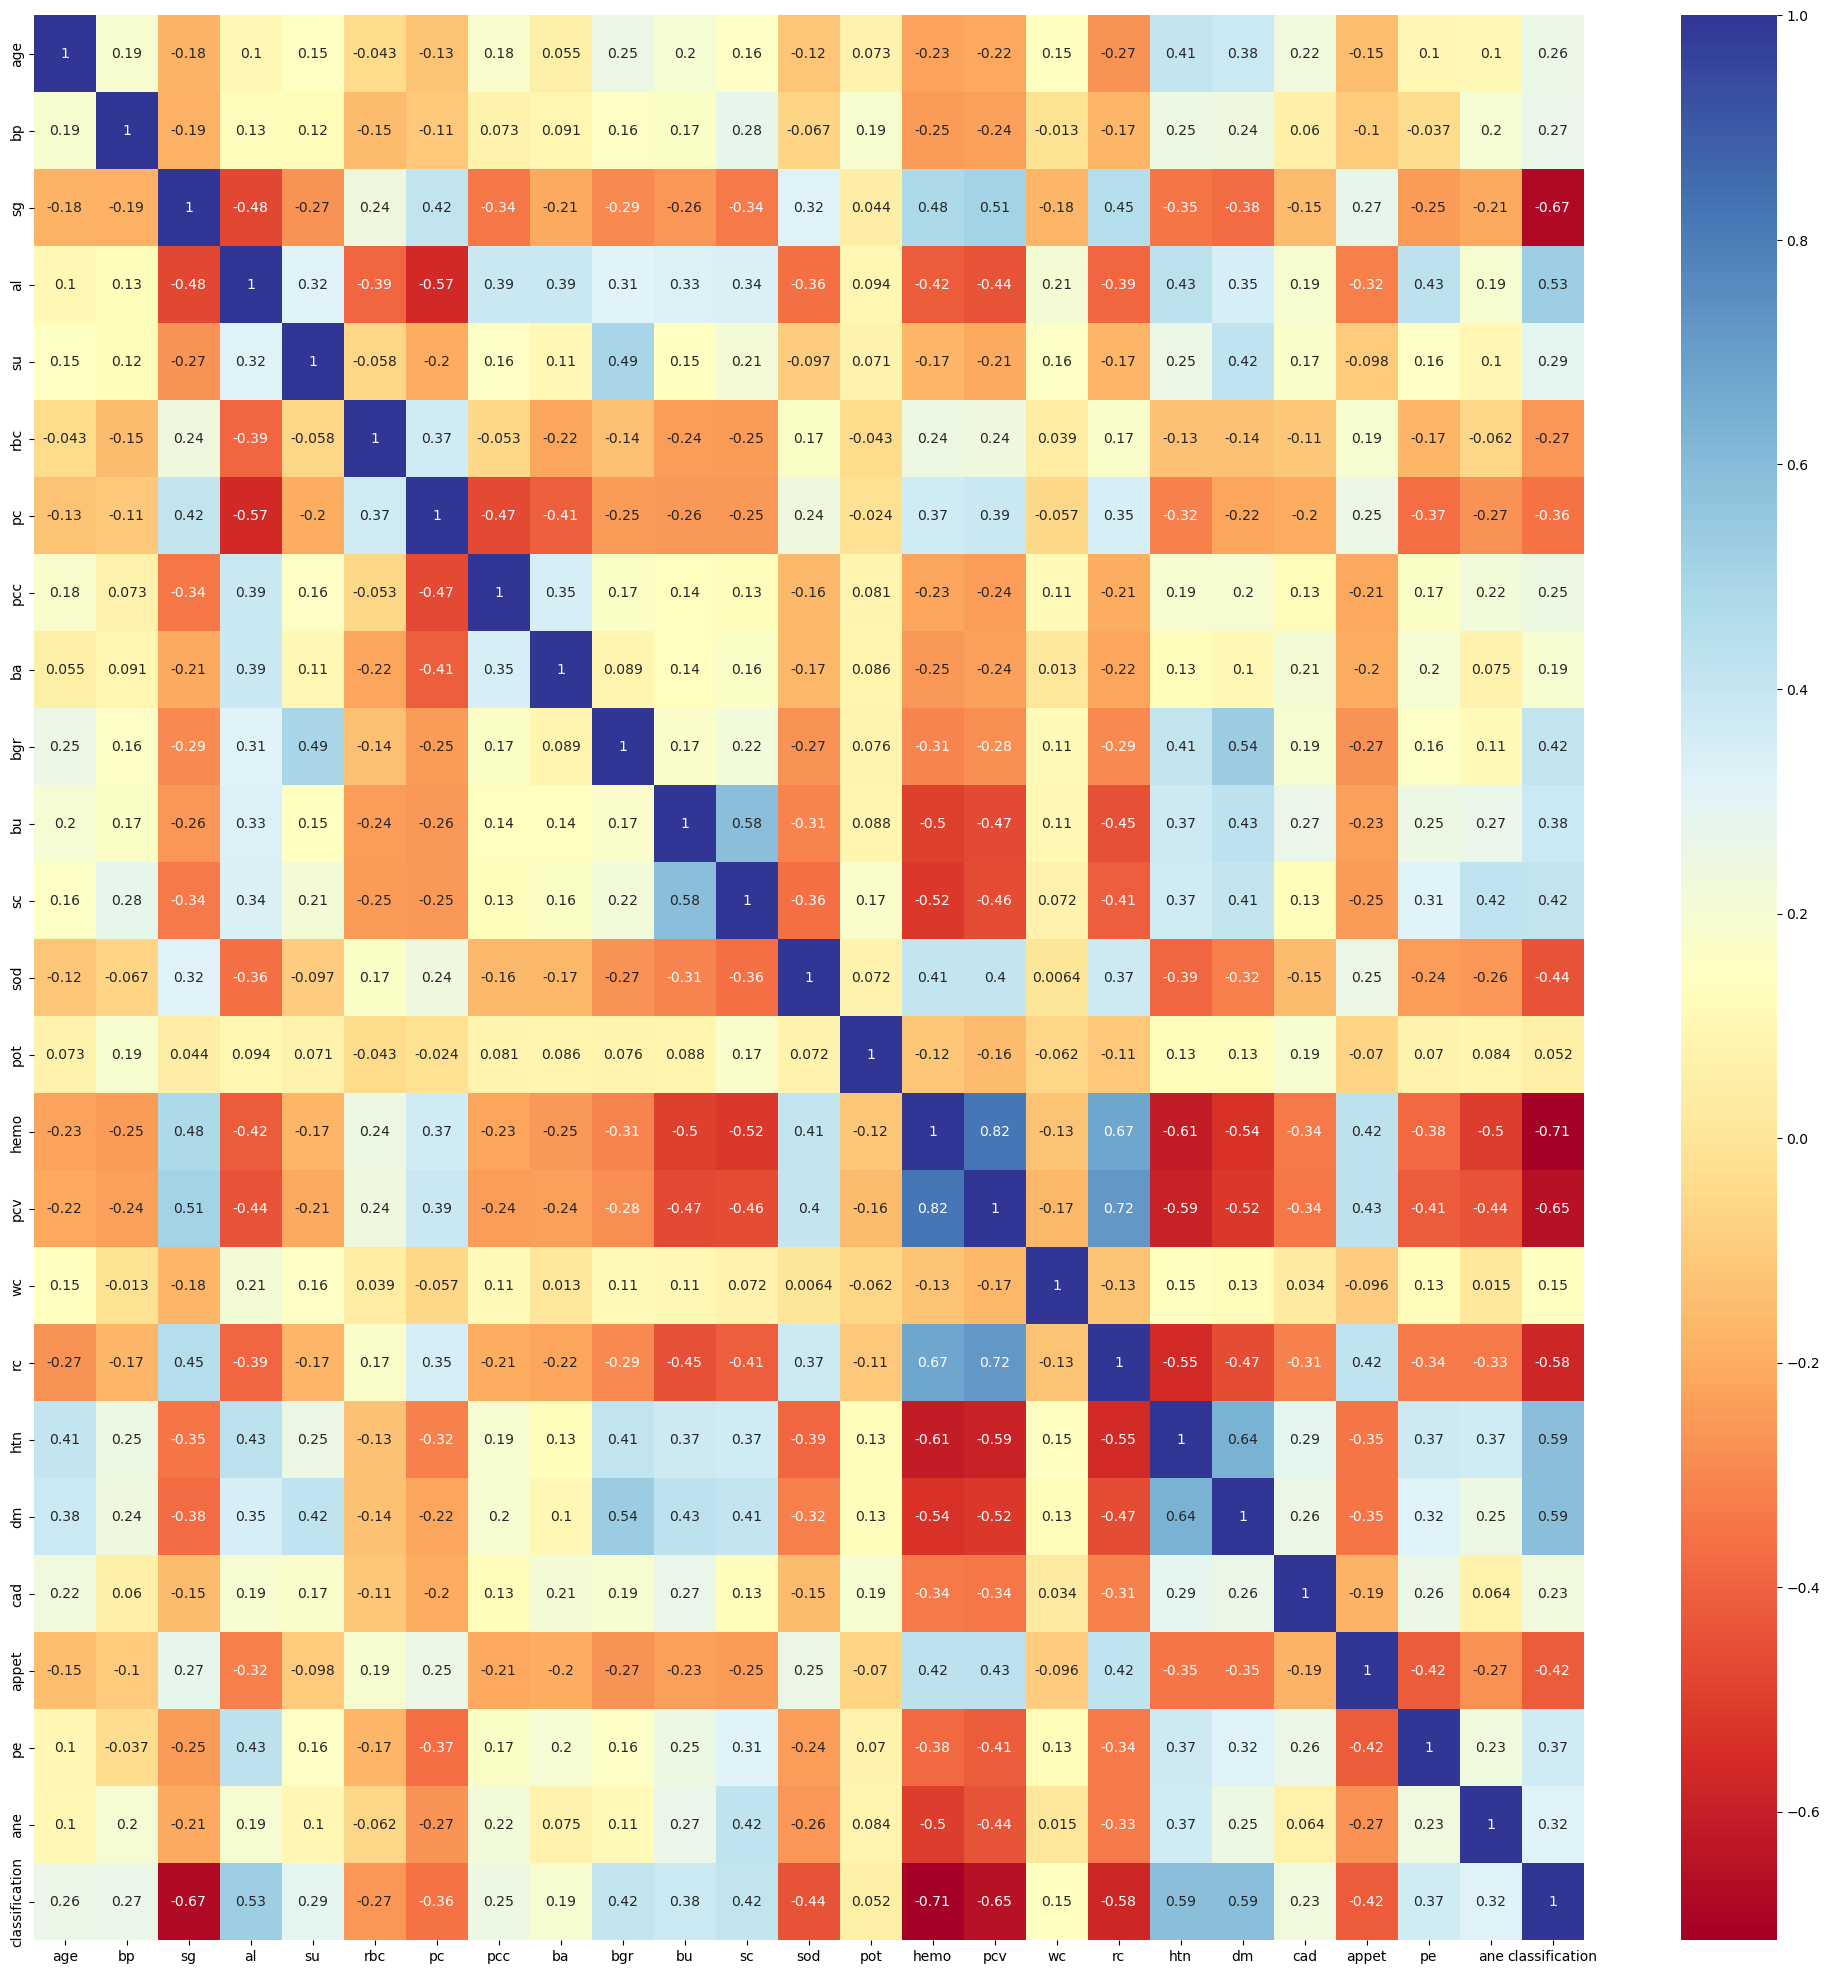

In [124]:
plt.figure(figsize=(25, 25))
Train_df_corr = train_df.corr()
sns.heatmap(Train_df_corr, 
            xticklabels = Train_df_corr.columns.values,
            yticklabels = Train_df_corr.columns.values,
            annot = True, cmap = 'RdYlBu');

In [125]:
drop_feat=['hemo','pcv','htn']
train_df.drop(drop_feat,axis=1,inplace=True)

    age     bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...    sod  pot  \
0  62.0   70.0  1.025  3.0  0.0    1   0    0   0  122.0  ...  136.0  4.7   
1  54.0   70.0  1.020  0.0  0.0    1   1    0   0  233.0  ...  138.0  4.4   
2  47.0   80.0  1.020  0.0  0.0    1   1    0   0  114.0  ...  139.0  3.7   
3  43.0   60.0  1.025  0.0  0.0    1   1    0   0  108.0  ...  144.0  5.0   
4  42.0  100.0  1.015  4.0  0.0    1   0    0   1  124.0  ...  129.0  4.0   

       wc   rc  dm  cad  appet  pe  ane  classification  
0  7900.0  3.9   1    0      1   0    0               1  
1  7900.0  4.8   1    0      1   0    0               1  
2  7900.0  4.8   0    0      0   0    0               1  
3  7200.0  5.5   0    0      1   0    0               0  
4  8300.0  4.6   0    0      0   0    0               1  

[5 rows x 22 columns]


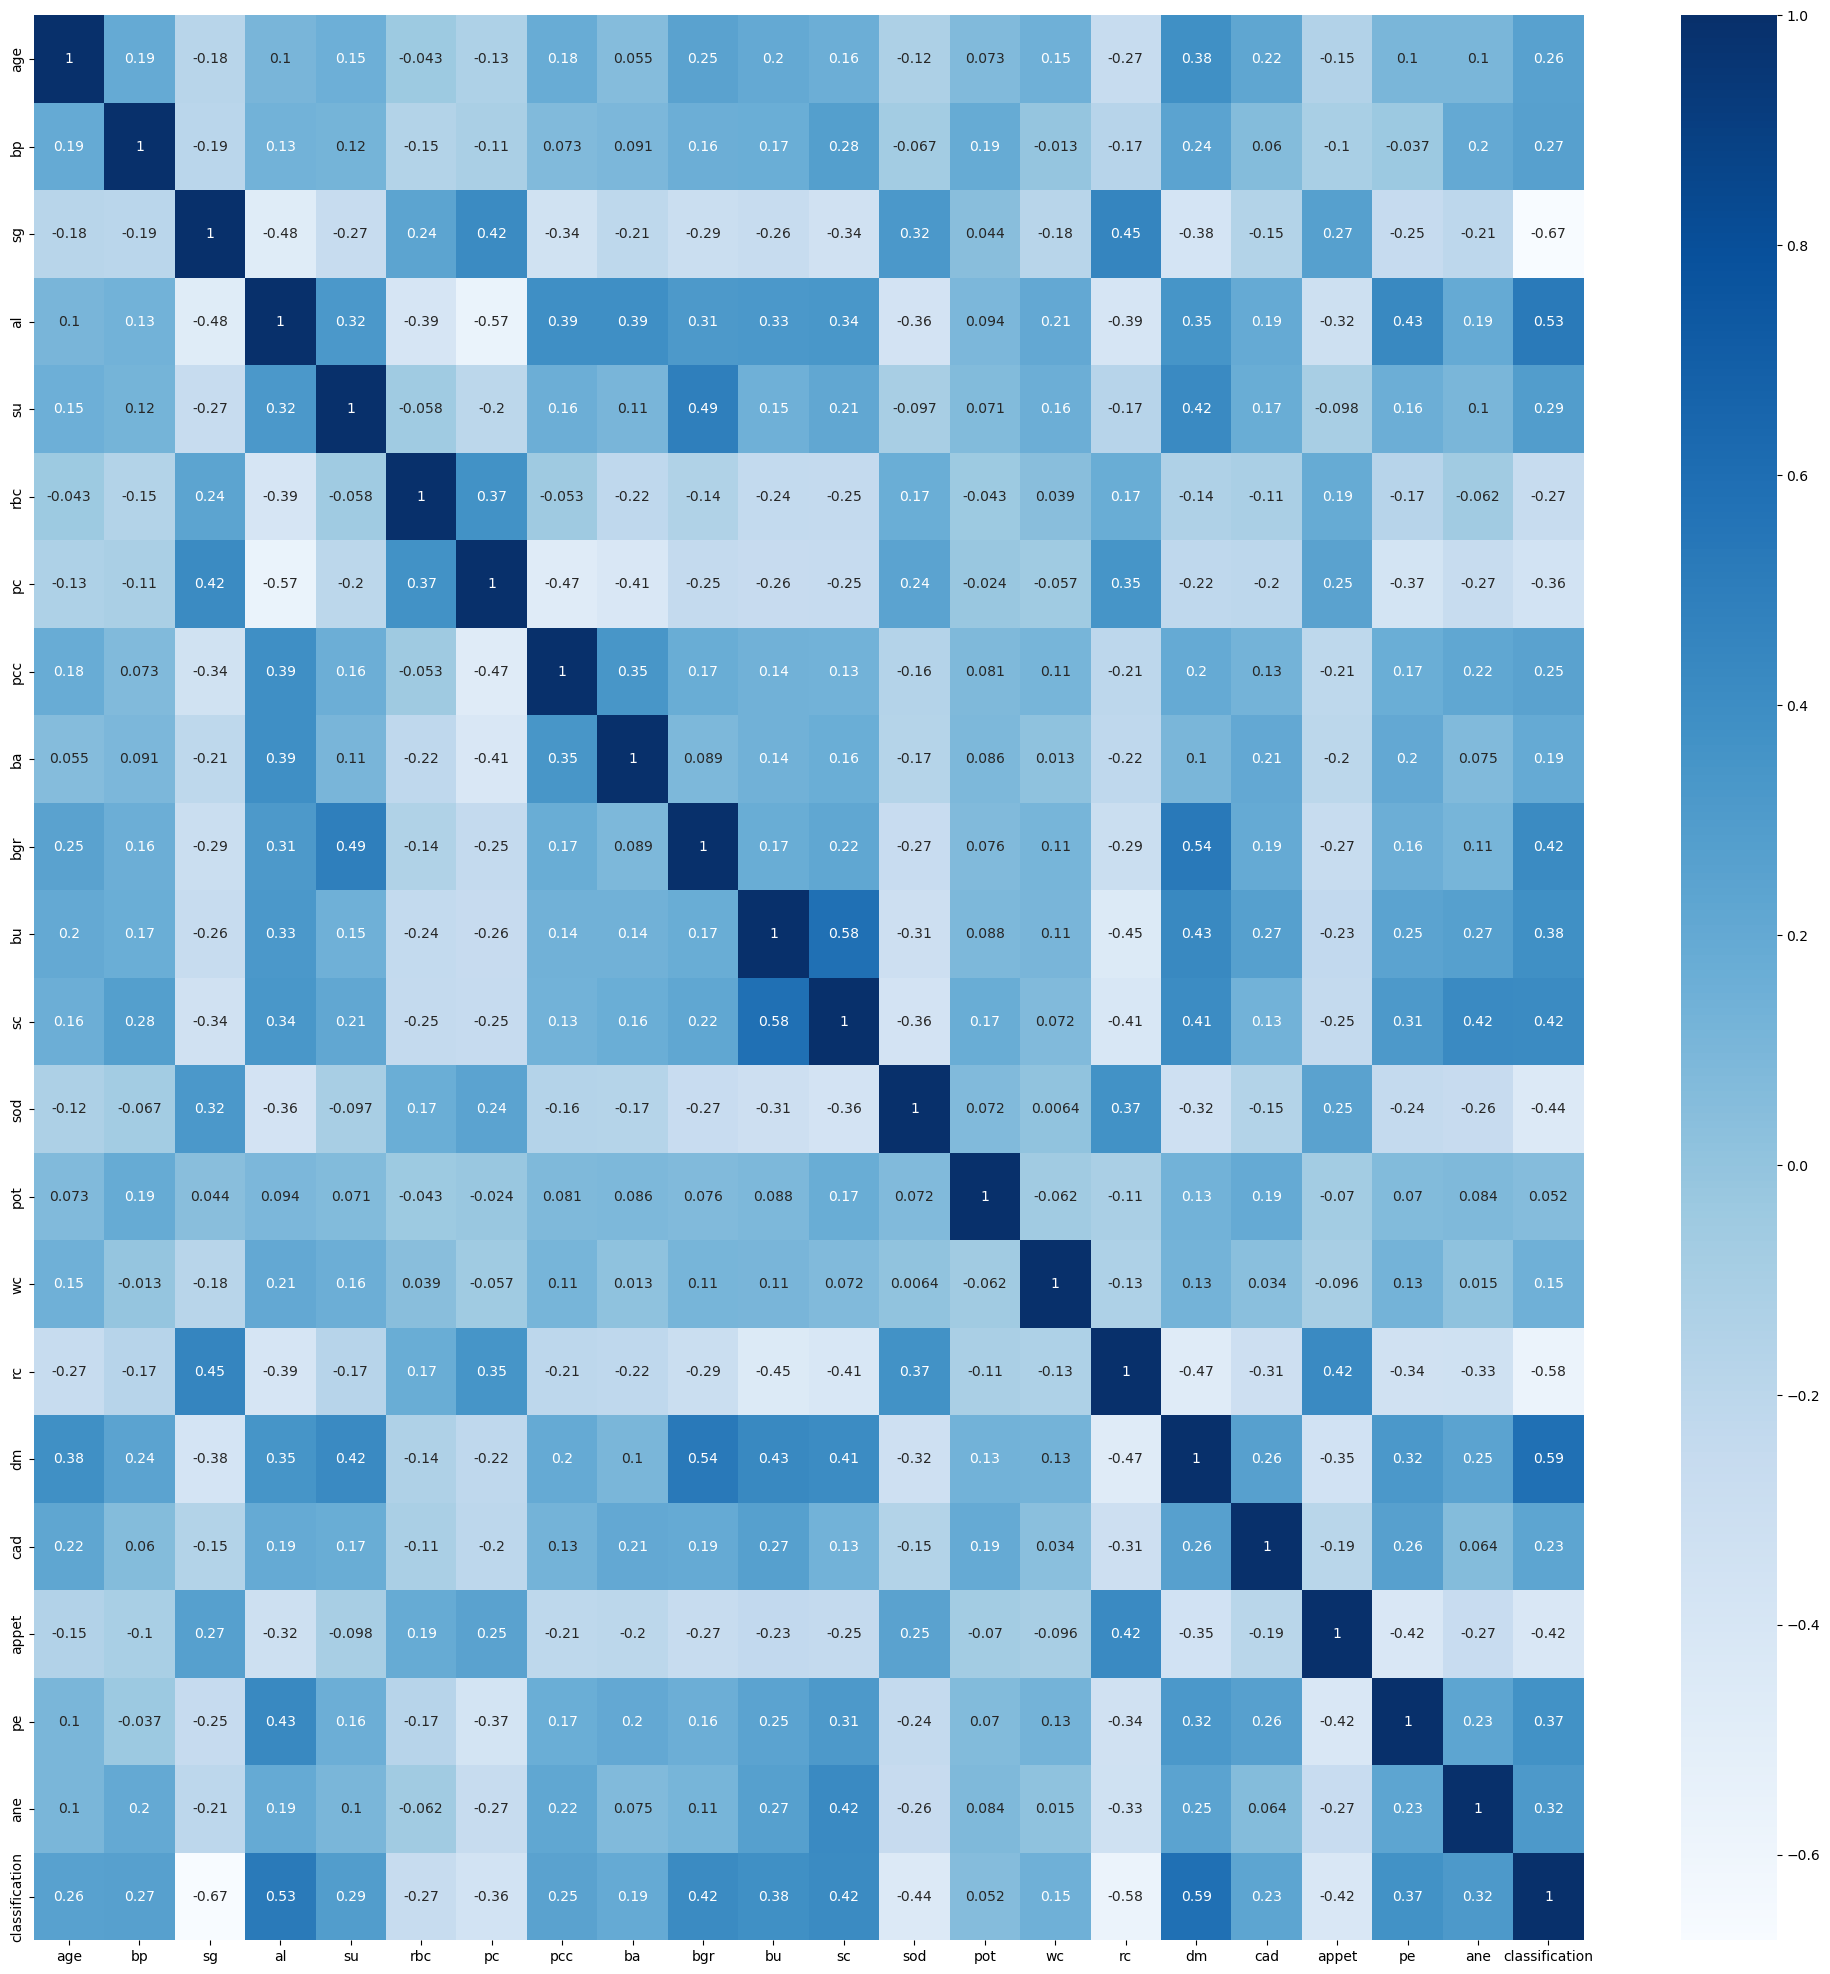

In [126]:
plt.figure(figsize=(25, 25))
Train_df_corr = train_df.corr()
sns.heatmap(Train_df_corr, 
            xticklabels = Train_df_corr.columns.values,
            yticklabels = Train_df_corr.columns.values,
            annot = True, cmap = 'Blues');
print(f'{train_df.head()}')

In [127]:
y = train_df['classification']
X = train_df.drop(['classification'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (196, 21)
X test shape:  (84, 21)
y train shape:  (196,)
y test shape:  (84,)


In [128]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
type(X_train_norm)

numpy.ndarray

In [129]:
X_train_norm


array([[0.36363636, 0.2       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.51136364, 0.        , 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.71590909, 0.6       , 0.25      , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.625     , 0.4       , 0.75      , ..., 1.        , 0.        ,
        1.        ],
       [0.75      , 0.4       , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.625     , 0.4       , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [130]:
data_train.shape[0], data_train.dropna().shape[0]

(280, 107)

In [131]:
data_train.dropna(inplace=True)

In [132]:
data_train.shape

(107, 26)

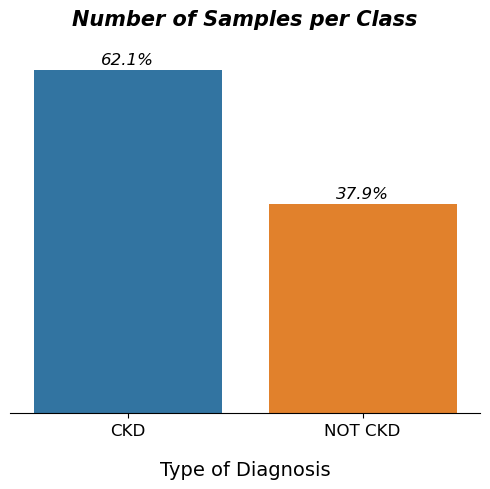

In [167]:
plt.figure(figsize=(5, 5))

sns.countplot(data = train_df , x = 'classification' , order = train_df['classification'].value_counts().index)
sns.despine(top=True, right=True, left=True, bottom=False)

plt.xticks(ticks= [0,1], labels=['CKD', 'NOT CKD'], fontsize=12)
plt.yticks([])
plt.title('Number of Samples per Class' , fontsize=15 , pad=20 , fontstyle='italic' , fontweight = 800)
plt.xlabel('Type of Diagnosis' , fontsize=14 , fontweight=400, labelpad=16)
plt.ylabel('')
ax = plt.gca()

for p in ax.patches:
    ax.annotate("%.1f%%" % (100*float(p.get_height()/train_df.shape[0])), (p.get_x() + p.get_width() / 2., abs(p.get_height())), ha='center', 
                va='bottom', color='black', xytext=(0,2), rotation='horizontal', textcoords='offset points', fontsize = 12, fontstyle = 'italic')

# plt.savefig("samples.png")
plt.tight_layout()

In [168]:
classes = ['CKD', 'NCKD']

In [163]:
#RandomForestClassifier


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99        49

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

----------------- Overall Results -----------------
Accuracy Result: 98.81%
Precision Result: 99.00%
Recall Result: 98.57%
F1-Score Result: 98.77%


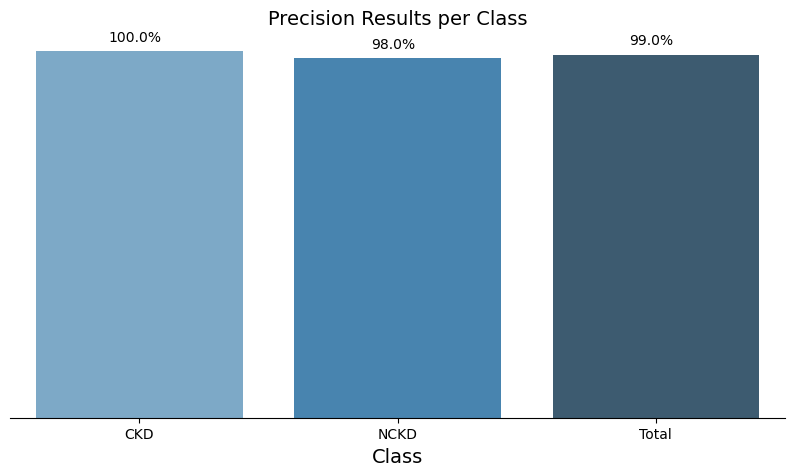

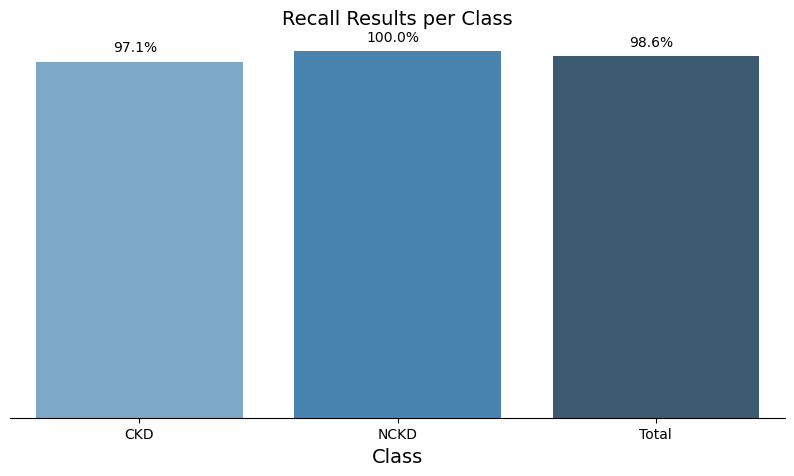

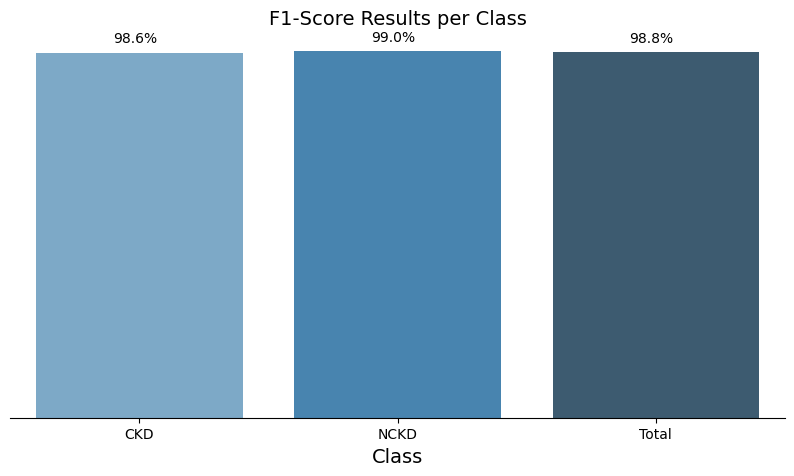

In [169]:
knn = RandomForestClassifier()
knn.fit(X_train, y_train)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

def metrics_plot(df,metric):
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=df, x=df.index, y=metric, palette = "Blues_d")
    # Bar Labels
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class',fontsize = 14)
    ax.set_ylabel(metric,fontsize = 14)
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False) 
    plt.title(metric+ ' Results per Class', fontsize = 14);

metrics_plot(all_df, 'Precision')       # Results by Class
metrics_plot(all_df, 'Recall')          # Results by Class
metrics_plot(all_df, 'F1-Score')         # Results by Class
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   # Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     # Precision of the whole Dataset
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        # Recall of the whole Dataset
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))      # F1-Score of the whole Dataset

In [ ]:
#logistic Regression

              precision    recall  f1-score   support

           0       0.64      0.66      0.65        35
           1       0.75      0.73      0.74        49

    accuracy                           0.70        84
   macro avg       0.69      0.70      0.70        84
weighted avg       0.70      0.70      0.70        84

----------------- Overall Results -----------------
Accuracy Result: 70.24%
Precision Result: 69.44%
Recall Result: 69.59%
F1-Score Result: 69.51%


C:\Users\sudha\anaconda3\envs\prediction\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


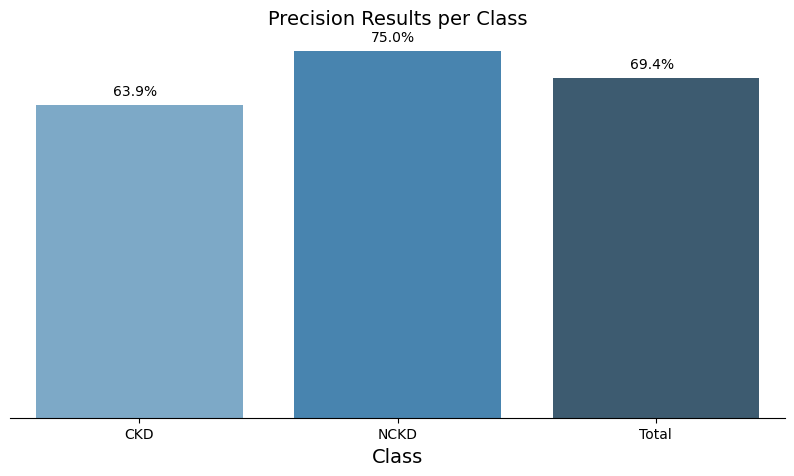

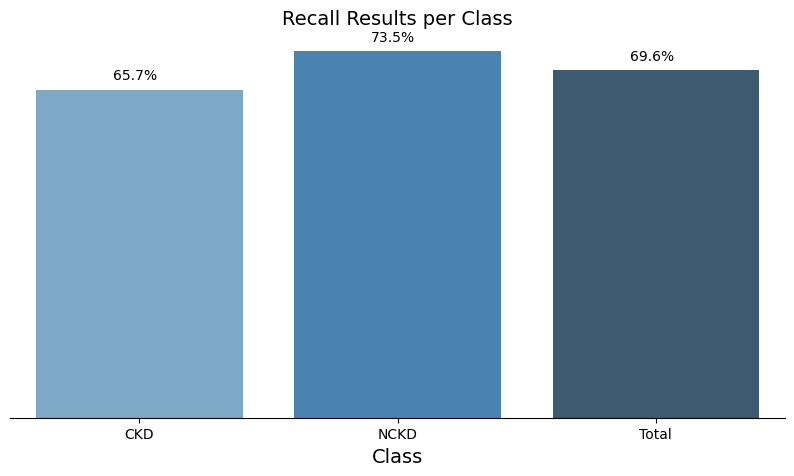

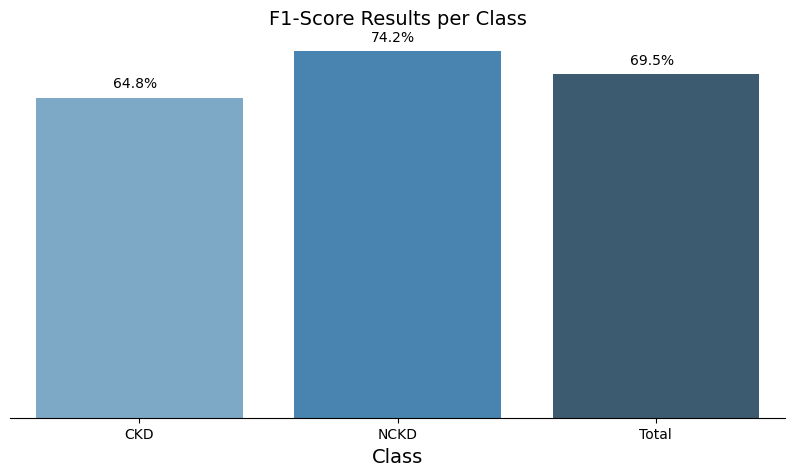

In [170]:
knn = LogisticRegression()
knn.fit(X_train, y_train)

# prediction
preds = knn.predict(X_test)
print(classification_report(y_test, preds))

acc = accuracy_score(y_test, preds)
results_all = precision_recall_fscore_support(y_test, preds, average='macro', zero_division=1)
results_class = precision_recall_fscore_support(y_test, preds, average=None, zero_division=1)
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = classes+['Total']

def metrics_plot(df,metric):
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=df, x=df.index, y=metric, palette = "Blues_d")
    # Bar Labels
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class',fontsize = 14)
    ax.set_ylabel(metric,fontsize = 14)
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False) 
    plt.title(metric+ ' Results per Class', fontsize = 14);

metrics_plot(all_df, 'Precision')       # Results by Class
metrics_plot(all_df, 'Recall')          # Results by Class
metrics_plot(all_df, 'F1-Score')         # Results by Class
print('----------------- Overall Results -----------------')
print('Accuracy Result: %.2f%%'%(acc*100))                   # Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[2,0]*100))     # Precision of the whole Dataset
print('Recall Result: %.2f%%'%(all_df.iloc[2,1]*100))        # Recall of the whole Dataset
print('F1-Score Result: %.2f%%'%(all_df.iloc[2,2]*100))      # F1-Score of the whole Dataset

In [171]:
#AdaBoostClassifier
model=AdaBoostClassifier()

In [172]:
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [173]:
pipeline=Pipeline(steps=[('r',resample),('m',model)])
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scoring = ['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline,X,y,scoring=scoring , cv=cv, n_jobs=-1)

In [174]:
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.9560
Mean Precision: 0.9539
Mean Recall: 0.9576


In [175]:
#Feature Selection
feature_dict=dict(zip(data_train.columns,list(logreg.coef_[0])))
feature_dict


{'id': -0.0032572656280309502,
 'age': 0.06902228371003011,
 'bp': 0.14760687162812536,
 'sg': 3.0551471200708775,
 'al': 0.5740510426345922,
 'su': -0.6878993033283874,
 'rbc': -0.6196637825278959,
 'pc': 0.04720999218549408,
 'pcc': 0.03348852659830662,
 'ba': 0.03736007619566077,
 'bgr': -0.018423720845978944,
 'bu': 3.529561458988508,
 'sc': -0.03650366313190127,
 'sod': 0.2160276831066025,
 'pot': 0.00010119618978497087,
 'hemo': -1.72296678007325,
 'pcv': 1.7194899874099585,
 'wc': 0.372906505544723,
 'rc': -1.2215804430948838,
 'htn': 1.1911210534698873,
 'dm': 1.1096091461728426}

<Axes: title={'center': 'Feature Importance'}>

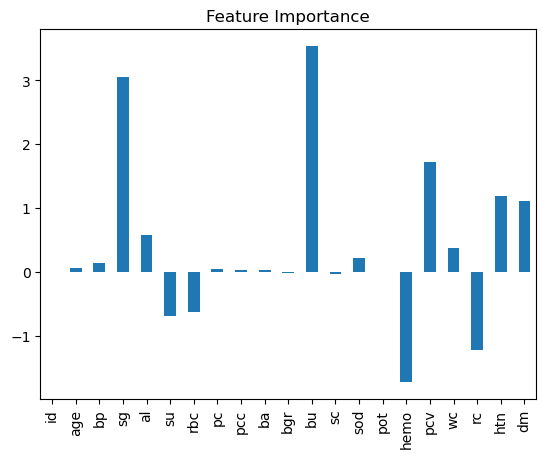

In [176]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")